# Analysis of Amazon Bestselling Novels 2009-2020

**About the project**

This project was created to explore trends and find patterns in the bestselling novels of 12 years.

**About dataset**

Dataset was taken from Kaggle - https://www.kaggle.com/datasets/palanjali007/amazons-top-50-bestselling-novels-20092020/data

The dataset contains data on top 50 bestselling novels on Amazon for each year from 2009 to 2020. It consists of 7 columns and 600 rows.

Columns names as follow:
- **Name** - title of novel 
- **Author** - autor of nowel 
- **User Rating** - user rating of novel 
- **Reviews** - number of reviews
- **Price** - price of book
- **Year** - year in which novel was in top-50 of bestsellers
- **Genre** - genre of novel (fiction or non fiction)

## 1. Importing the dataset

In [2]:
import pandas as pd

bestsellers = pd.read_csv("AmazonBooks - Sheet1.csv")

bestsellers

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
595,Live Free Or Die: America (and the World) on t...,Sean Hannity,4.8,20153,15,2020,Non Fiction
596,Burn After Writing,Sharon Jones,4.6,26423,8,2020,Non Fiction
597,Get Out of Your Head: Stopping the Spiral of T...,Jennie Allen,4.7,12879,14,2020,Non Fiction
598,Human Body Activity Book for Kids: Hands-On Fu...,Katie Stokes,4.7,14128,5,2020,Non Fiction


In [3]:
#show general information about DataFrame
bestsellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         600 non-null    object 
 1   Author       600 non-null    object 
 2   User Rating  600 non-null    float64
 3   Reviews      600 non-null    int64  
 4   Price        600 non-null    int64  
 5   Year         600 non-null    int64  
 6   Genre        600 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 32.9+ KB


**In this DataFrame all data types is shows correct and null data is does not exist**

## 2. Cleaning the data

From previous step is already known that dataset do not contains null values. 
So in this step I will check if there is duplicates.

In [4]:
bestsellers[bestsellers.duplicated()]

,Name,Author,User Rating,Reviews,Price,Year,Genre


There is no duplicates in dataset.

## 3. Data analysis and visualization

For data visualizations I will use Matplotlib library.

In [5]:
import matplotlib
import matplotlib.pyplot as plt

**1. Most popular genre.**

In [6]:
# counting fiction and non fiction books
fiction = len(bestsellers[bestsellers['Genre'] == 'Fiction'])
print(fiction)

non_fiction = len(bestsellers[bestsellers['Genre'] == 'Non Fiction'])
print(non_fiction)

fiction_and_non = [fiction, non_fiction]
print(fiction_and_non)


263
337
[263, 337]


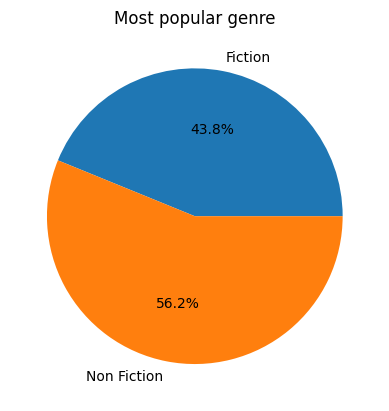

In [7]:
labels_pie = ['Fiction', 'Non Fiction']

plt.pie(fiction_and_non, labels=labels_pie, autopct='%1.1f%%')
plt.title('Most popular genre')
plt.show() 

Here we can see that most popular genre is Non Fiction with 56.2%.

**2.Distribution of Fiction and Non Fiction bestsellers by year.**

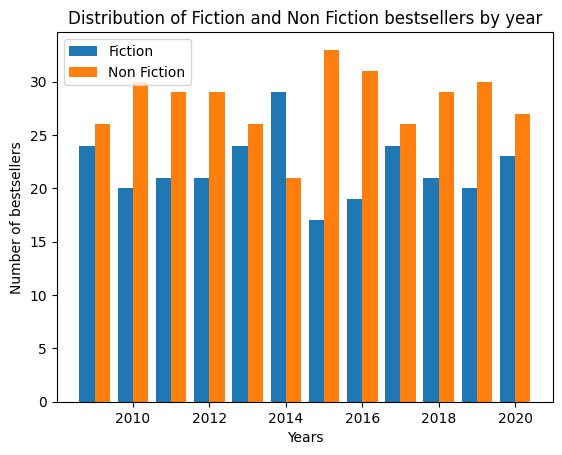

In [8]:
group_data = bestsellers.groupby(['Year', 'Genre']).size().unstack().reset_index()

plt.bar(group_data['Year'] - 0.2, group_data['Fiction'], 0.4, label='Fiction')
plt.bar(group_data['Year'] + 0.2, group_data['Non Fiction'], 0.4, label='Non Fiction')

plt.title('Distribution of Fiction and Non Fiction bestsellers by year')
plt.legend(loc='upper left')
plt.ylabel('Number of bestsellers')
plt.xlabel('Years')

plt.show()


On this graph we can see distribution of genre over the years. There is no dynamic to change genre. Every year non fiction was most popular except 2014 year.

**3.Changes in book prices by genre over the years.**

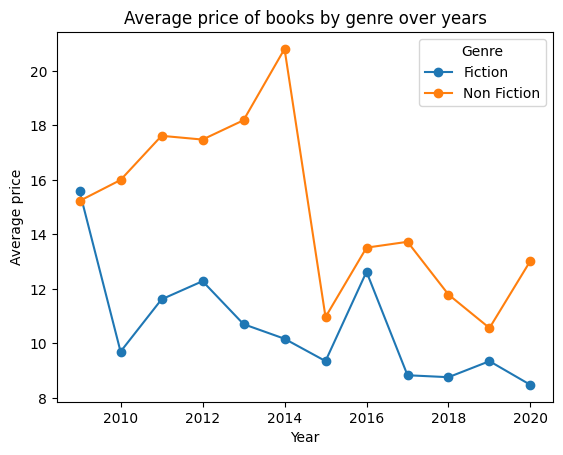

In [19]:
average_price = bestsellers.pivot_table(values='Price', index='Year', columns='Genre', aggfunc='mean')

average_price.plot.line(marker='o')
plt.xlabel('Year')
plt.ylabel('Average price')
plt.title('Average price of books by genre over years')
plt.legend(title='Genre')
plt.show()

How we can see from this graph Non Fiction is way more expensive than Fiction. Conclision that we can make is that price does not affect popularity. However in 2014 price of Non Fiction was increased (it was the peak price in 12 years) and this is was only year were sales of Non Fiction was lower than Fiction sales (this we can see on graph 2). 

**4. Change in book prices over years.**

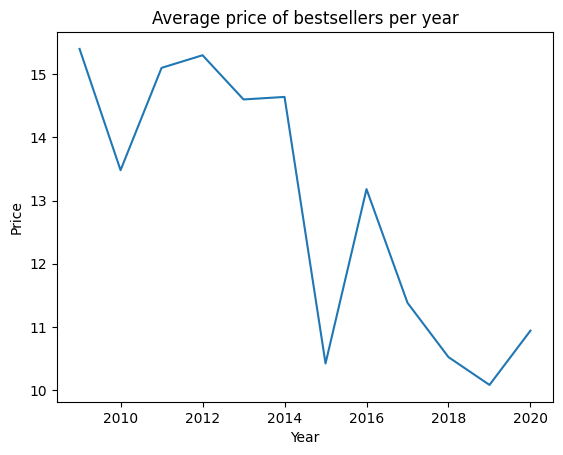

In [20]:
average_price = bestsellers.groupby('Year')['Price'].mean().reset_index()

plt.plot(average_price['Year'], average_price['Price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Average price of bestsellers per year')
plt.show()


This graph is shows us that there is a downward trend in the average price of books.

**5.The most popular authors for 12 years.**

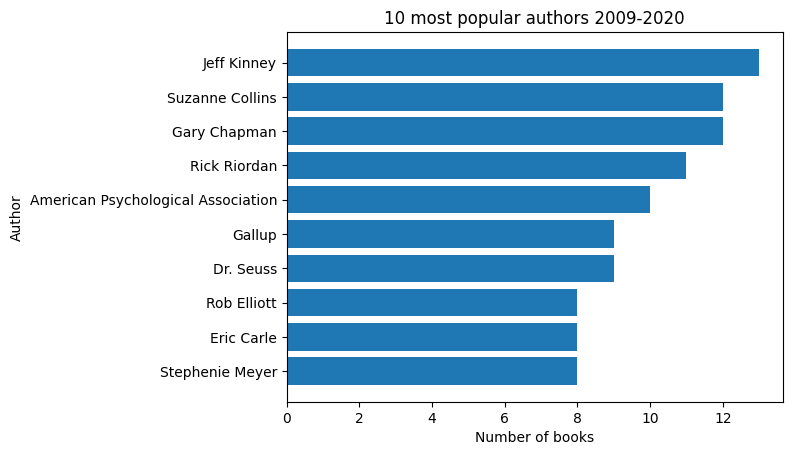

In [21]:
authors_number = bestsellers.groupby(['Author']).size().reset_index(name='Number').sort_values('Number', ascending=False)

top_10 = authors_number.head(10).sort_values('Number', ascending=True)
plt.barh(top_10['Author'], top_10['Number'])
plt.title('10 most popular authors 2009-2020')
plt.xlabel('Number of books')
plt.ylabel('Author')
plt.show()


Here we can see 10 most popular authors for 12 years.

**6.The most popular books for 12 years.**

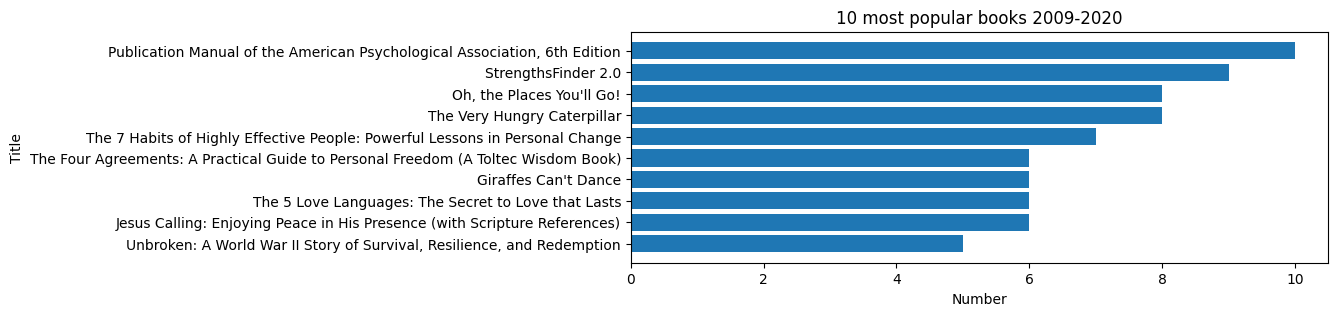

In [22]:
books_number = bestsellers.groupby(['Name']).size().reset_index(name='Number').sort_values('Number', ascending=False)
top_books = books_number.head(10).sort_values('Number', ascending=True)

plt.figure(figsize =(9,3))
plt.barh(top_books['Name'], top_books['Number'])
plt.title('10 most popular books 2009-2020')
plt.xlabel('Number')
plt.ylabel('Title')
plt.show()


Here we can see 10 most popular books for 12 years.

## 4. Conclusions

1. Most popular genre is Non Fiction.
   
2. There is no trend to changing most popular genre.
   
3. Non Fiction books more expensive than Fiction.
   
4. 2014 is the only year in which non-fiction sales were lower than fiction sales. In 2014, the price of Non Fiction was increased (this was the peak price in 12 years). In 2015 price of Non Fiction was decreased It can be concluded that the increase in prices of Non Fiction books may have affected sales.
   
5. There is a tendency to decrease the average price of books.